# Fingerprints: Feature distributions

We look at the distribution of features values observed in almost 5000 structures in order to get an impression on the feature value ranges and frequencies.

Recap - in the `kissim` fingerprint we have three feature groups:

- Physicochemical features (discrete/categorial values)
- Distances between residues and subpocket centers (continuous values)
- Moments (mean, standard deviation, skewness) of aforementioned distance distributions (continuous values)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kissim.encoding import FingerprintGenerator

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/all"

Define feature names as to be displayed in plots.

In [5]:
SUBPOCKET_NAMES = {
    "hinge_region": "Hinge region",
    "dfg_region": "DFG region",
    "front_pocket": "Front pocket",
    "center": "Center",
}
PHYSICOCHEMICAL_NAMES = {
    "size": "Size",
    "hbd": "HBD",
    "hba": "HBA",
    "charge": "Charge",
    "aromatic": "Aromatic",
    "aliphatic": "Aliphatic",
    "sco": "Side chain orientation",
    "exposure": "Solvent exposure",
}
FEATURE_GROUP_TO_COLOR = {
    "physicochemical": "cornflowerblue",
    "distances": "gold",
    "moments": "orange",
}

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [6]:
fingerprint_generator = FingerprintGenerator.from_json(
    RESULTS / "fingerprints_clean.json", normalize=True
)
print(f"Number of fingerprints: {len(fingerprint_generator.data)}")

Number of fingerprints: 4623


## Feature distributions

Discrete datasets will be displayed as barplot, continuous datasets as histograms, boxplots, and violin plots.

### Physicochemical features (discrete values)

In [7]:
features_p = fingerprint_generator.physicochemical_exploded(normalized=False)
features_p_normalized = fingerprint_generator.physicochemical_exploded(normalized=True)
features_p

size  hbd  hba  charge  aromatic  aliphatic  \
structure_klifs_id residue_ix                                                
1                  1            3.0  3.0  0.0     1.0       0.0        0.0   
                   2            1.0  0.0  0.0     0.0       0.0        1.0   
                   3            2.0  0.0  0.0     0.0       0.0        1.0   
                   4            1.0  0.0  0.0     0.0       0.0        0.0   
                   5            1.0  0.0  0.0     0.0       0.0        1.0   
...                             ...  ...  ...     ...       ...        ...   
13740              81           2.0  0.0  2.0    -1.0       0.0        0.0   
                   82           3.0  0.0  0.0     0.0       1.0        0.0   
                   83           1.0  0.0  0.0     0.0       0.0        0.0   
                   84           2.0  0.0  0.0     0.0       0.0        1.0   
                   85           1.0  0.0  0.0     0.0       0.0        1.0   

                               sco  sco.vertex_angle  exposure  exposure.ratio  
structure_klifs_id residue_ix                                                   
1                  1           2.0         84.101055       3.0        0.888889  
                   2           3.0        122.173560       3.0        0.705882  
                   3           1.0         35.040406       1.0        0.304348  
                   4           NaN               NaN       1.0        0.277778  
                   5           3.0        138.543236       3.0        1.000000  
...                            ...               ...       ...             ...  
13740              81          3.0        124.655362       3.0        0.600000  
                   82          2.0         80.966333       1.0        0.416667  
                   83          NaN               NaN       3.0        0.676471  
                   84          3.0        102.521503       3.0        0.566667  
                   85          2.0         48.270818       1.0        0.378378  

[392955 rows x 10 columns]

__Note__: The categories for the features _side chain orientation (SCO)_ and _solvent exposure (exposure)_ are based on continuous values (`sco.vertex_angle` and `exposure.ratio`). Before we take a look at the discrete values, let's first check the distribution of these continuous values.

#### Continuous value distribution (SCO/exposure)

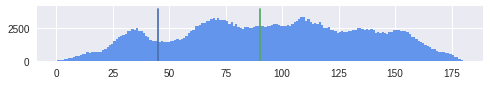

In [8]:
# Limits that were used to define categories
LIMIT1 = 45
LIMIT2 = 90
ax = features_p["sco.vertex_angle"].hist(
    figsize=(8, 1), bins=180, color=FEATURE_GROUP_TO_COLOR["physicochemical"]
)
ax.plot([LIMIT1, LIMIT1], [0, 4000])
ax.plot([LIMIT2, LIMIT2], [0, 4000])

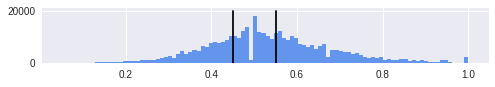

In [9]:
# Limits that were used to define categories
LIMIT1 = 0.45
LIMIT2 = 0.55
ax = features_p["exposure.ratio"].hist(
    figsize=(8, 1), bins=100, color=FEATURE_GROUP_TO_COLOR["physicochemical"]
)
ax.plot([LIMIT1, LIMIT1], [0, 20000], color="black")
ax.plot([LIMIT2, LIMIT2], [0, 20000], color="black");

#### Discrete value count

In [10]:
# Select only discrete values
features_p = (
    features_p.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    .rename(columns=PHYSICOCHEMICAL_NAMES)
    .astype("Int32")
)
features_p_normalized = features_p_normalized.rename(
    columns=PHYSICOCHEMICAL_NAMES
)  # .astype("Int32")

Count number of bits per category and feature type.

In [11]:
counts = (
    pd.concat([feature.dropna().value_counts() for name, feature in features_p.items()], axis=1)
    .fillna(0)
    .astype("int32")
)
counts_normalized = (
    pd.concat(
        [feature.dropna().value_counts() for name, feature in features_p_normalized.items()],
        axis=1,
    )
    .fillna(0)
    .astype("int32")
)
counts

,Size,HBD,HBA,Charge,Aromatic,Aliphatic,Side chain orientation,Solvent exposure
-1,0,0,0,41555,0,0,0,0
0,0,252522,266501,299809,337718,207864,0,0
1,124341,116480,79944,46636,50282,180136,52903,107718
2,208450,0,41555,0,0,0,110312,115564
3,55209,18998,0,0,0,0,192193,164631


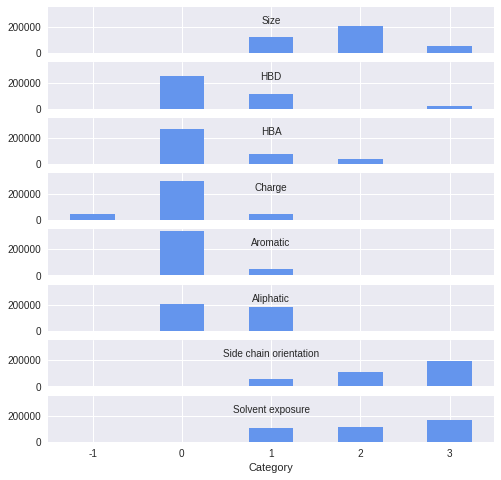

In [12]:
axes = counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    sharey=True,
    sharex=True,
    rot=0,
    title=None,
    figsize=(8, 8),
)
[ax.set_title("") for ax in axes]
[
    [i.set_visible(False) for i in ax.legend(loc=9, handlelength=0, handletextpad=0).legendHandles]
    for ax in axes
]
axes[-1].set_xlabel("Category");

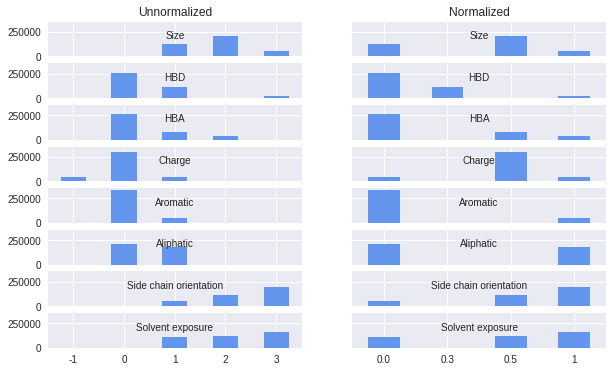

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(10, 6), sharey=True)
counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    title=None,
    ax=[ax[0] for ax in axes],
)
counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    title=None,
    ax=[ax[1] for ax in axes],
)
[ax[1].set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes]
[ax.set_title("") for ax in axes.flatten()]
[
    [i.set_visible(False) for i in ax.legend(loc=9, handlelength=0, handletextpad=0).legendHandles]
    for ax in axes.flatten()
]
axes[0][0].set_title("Unnormalized")
axes[0][1].set_title("Normalized");

### Distance features (continuous values)

In [14]:
features_d = fingerprint_generator.distances_exploded(normalized=False)
features_d_normalized = fingerprint_generator.distances_exploded(normalized=True)
features_d

hinge_region  dfg_region  front_pocket  \
structure_klifs_id residue_ix                                           
1                  1              13.453884   18.280884     14.480577   
                   2              12.553288   15.885122     12.370021   
                   3              10.540322   14.686474      9.160533   
                   4              10.875768   12.470337      8.180632   
                   5              13.355084   12.179722     10.597742   
...                                     ...         ...           ...   
13740              81              8.176181    6.305268      6.473903   
                   82             10.908327    6.283243     10.256677   
                   83             12.301838    4.710865     10.973125   
                   84             15.421875    8.506138     13.081077   
                   85             15.769991    9.725726     14.484319   

                                  center  
structure_klifs_id residue_ix             
1                  1           17.260859  
                   2           15.571550  
                   3           13.120049  
                   4           12.173719  
                   5           13.909365  
...                                  ...  
13740              81           2.834086  
                   82           5.545019  
                   83           7.593192  
                   84          10.190306  
                   85          10.333244  

[392955 rows x 4 columns]

In [15]:
features_d = features_d.rename(columns=SUBPOCKET_NAMES)
features_d_normalized = features_d_normalized.rename(columns=SUBPOCKET_NAMES)
var_name_d = "Subpocket"
value_name_d = "Distance"

In [16]:
features_d_melted = features_d.melt(var_name=var_name_d, value_name=value_name_d)
features_d_normalized_melted = features_d_normalized.melt(
    var_name=var_name_d, value_name=value_name_d
)

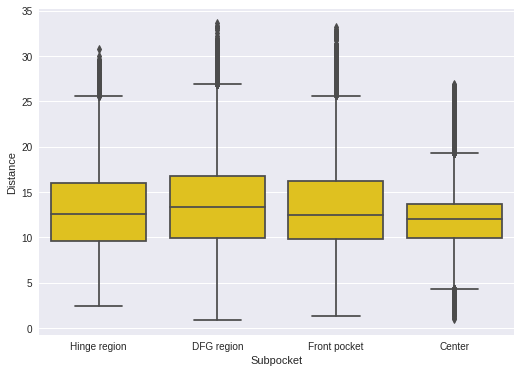

In [17]:
plt.figure(figsize=(8.5, 6))
axes = sns.boxplot(
    x=var_name_d, y=value_name_d, data=features_d_melted, color=FEATURE_GROUP_TO_COLOR["distances"]
)

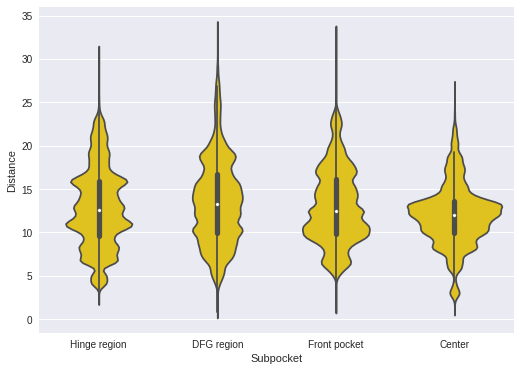

In [18]:
plt.figure(figsize=(8.5, 6))
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
);

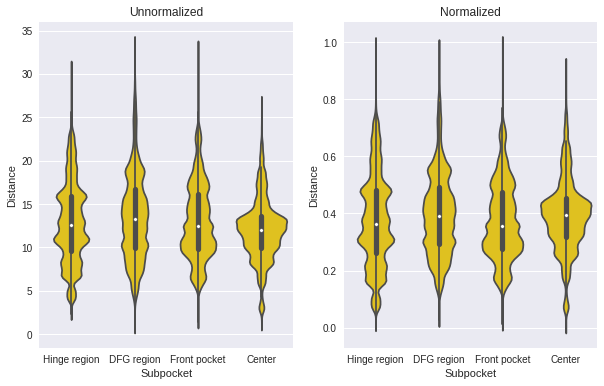

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for i, f in enumerate([features_d_melted, features_d_normalized_melted]):
    sns.violinplot(
        x=var_name_d,
        y=value_name_d,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["distances"],
        rot=90,
        ax=axes[i],
    )
axes[0].set_title("Unnormalized")
axes[1].set_title("Normalized");

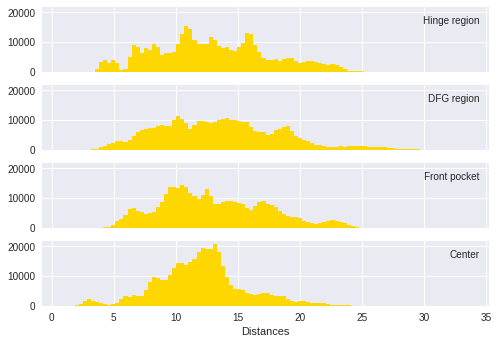

In [20]:
axes = features_d.plot(
    kind="hist",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    sharey=True,
    sharex=True,
    rot=0,
    bins=100,
)
[[i.set_visible(False) for i in ax.legend().legendHandles] for ax in axes]
[ax.set_ylabel("") for ax in axes]
axes[-1].set_xlabel("Distances");

### Moment features (continuous values)

In [21]:
features_m = fingerprint_generator.moments_exploded(normalized=False)
features_m_normalized = fingerprint_generator.moments_exploded(normalized=True)
features_m

hinge_region  dfg_region  front_pocket     center
structure_klifs_id moment                                                   
1                  1          12.660704   13.717344     12.971402  12.071524
                   2           4.380577    4.758410      4.145061   3.375659
                   3           2.819701    3.246053      3.110717   1.927249
2                  1          12.602406   13.396515     12.925749  11.903320
                   2           4.360724    4.848414      4.113458   3.317684
...                                 ...         ...           ...        ...
13735              2           4.582759    4.821134      4.719710   3.611094
                   3           3.010212    3.580667      4.335126   2.729107
13740              1          12.827957   13.284452     13.056724  11.888803
                   2           4.481328    4.896754      4.172857   3.442660
                   3           2.516069    4.019429      3.090514   1.952345

[13869 rows x 4 columns]

In [22]:
features_m = (
    features_m.rename(columns=SUBPOCKET_NAMES)
    .reset_index()
    .drop("structure_klifs_id", axis=1)
    .rename(columns={"moment": "Moment"})
)
features_m_normalized = (
    features_m_normalized.rename(columns=SUBPOCKET_NAMES)
    .reset_index()
    .drop("structure_klifs_id", axis=1)
    .rename(columns={"moment": "Moment"})
)
var_name_m = "Subpocket"
value_name_m = "Moment value"

In [23]:
features_m_melted = features_m.melt(
    id_vars=["Moment"], var_name=var_name_m, value_name=value_name_m
)
features_m_normalized_melted = features_m_normalized.melt(
    id_vars=["Moment"], var_name=var_name_m, value_name=value_name_m
)
features_m_melted

,Moment,Subpocket,Moment value
0,1,Hinge region,12.660704
1,2,Hinge region,4.380577
2,3,Hinge region,2.819701
3,1,Hinge region,12.602406
4,2,Hinge region,4.360724
...,...,...,...
55471,2,Center,3.611094
55472,3,Center,2.729107
55473,1,Center,11.888803
55474,2,Center,3.442660


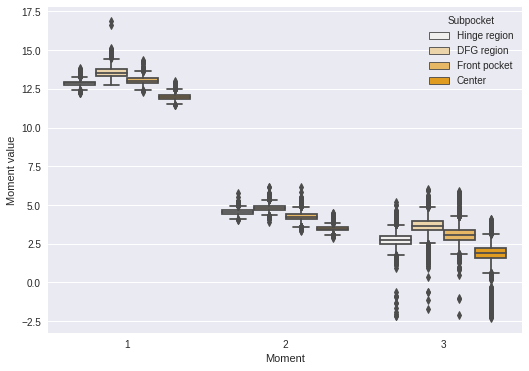

In [24]:
plt.figure(figsize=(8.5, 6))
axes = sns.boxplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
)

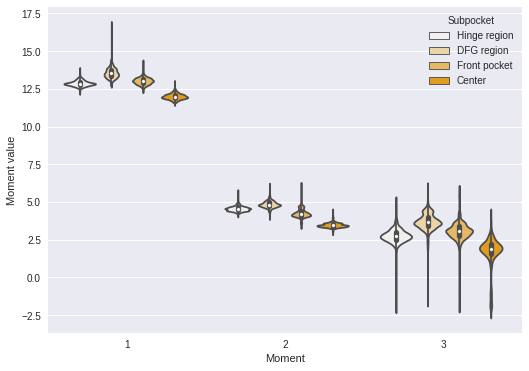

In [25]:
plt.figure(figsize=(8.5, 6))
axes = sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
)

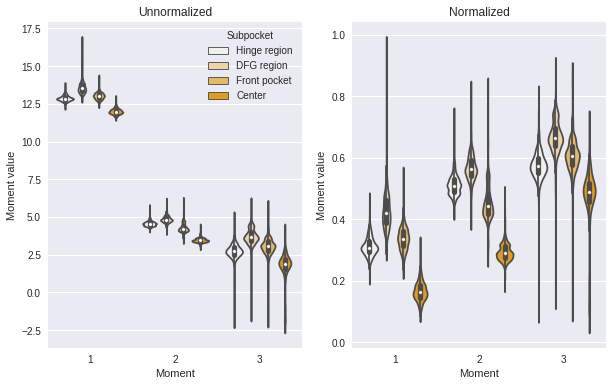

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for i, f in enumerate([features_m_melted, features_m_normalized_melted]):
    sns.violinplot(
        x="Moment",
        y=value_name_m,
        hue=var_name_m,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["moments"],
        rot=90,
        ax=axes[i],
    )
axes[0].set_title("Unnormalized")
axes[1].set_title("Normalized")
axes[1].get_legend().remove()

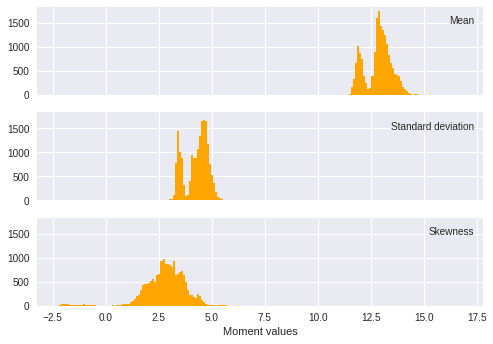

In [27]:
features_tmp = fingerprint_generator.moments_exploded()
features_tmp = features_tmp.stack().unstack(level=1).reset_index(drop=True)
features_tmp = features_tmp.rename(columns={1: "Mean", 2: "Standard deviation", 3: "Skewness"})

axes = features_tmp.plot(
    kind="hist",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    sharey=True,
    sharex=True,
    rot=0,
    bins=200,
)
[[i.set_visible(False) for i in ax.legend().legendHandles] for ax in axes]
[ax.set_ylabel("") for ax in axes]
axes[-1].set_xlabel("Moment values");

### Unnormalized vs. normalized features (summary)

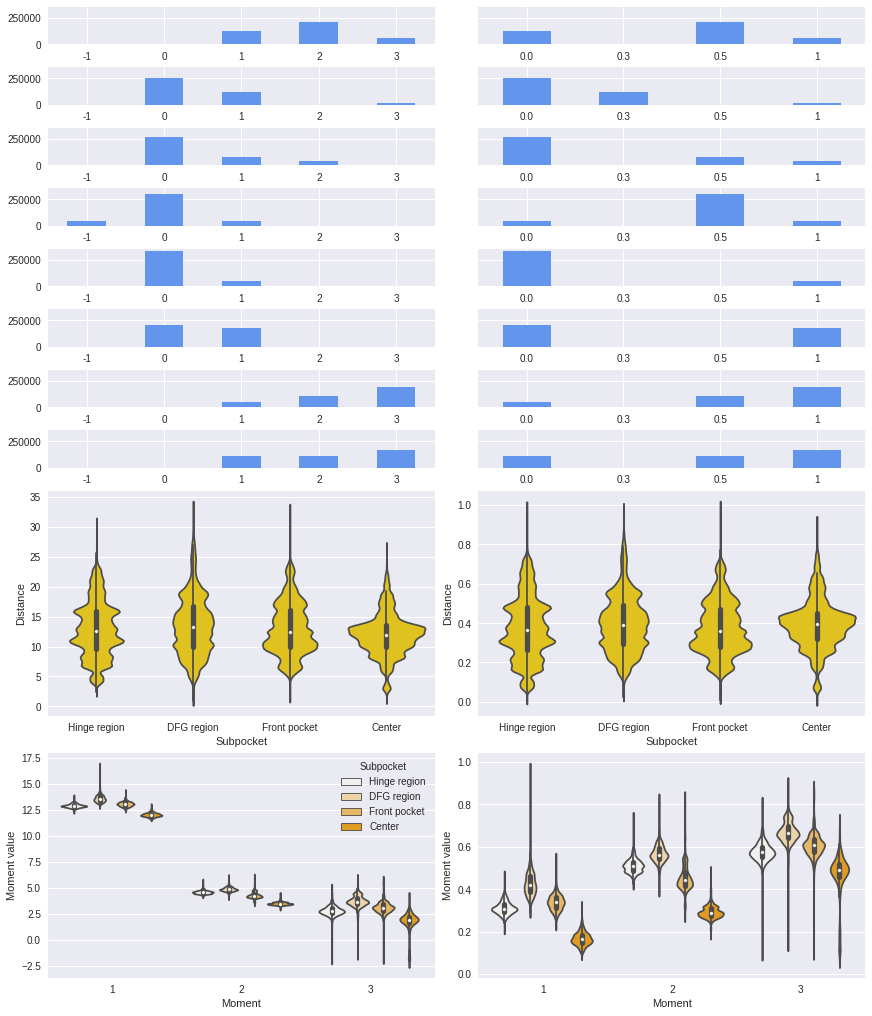

In [28]:
fig = plt.figure(constrained_layout=True, figsize=(12, 14))
ncols = 2
nrows = 10
widths = [1, 1]
heights = [1, 1, 1, 1, 1, 1, 1, 1, 6, 6]
spec = fig.add_gridspec(ncols=ncols, nrows=nrows, width_ratios=widths, height_ratios=heights)
axes = [[], []]

for col in range(ncols):
    for row in range(nrows):
        if 0 < row < 8:
            ax = fig.add_subplot(spec[row, col], sharey=axes[col][0])
        else:
            ax = fig.add_subplot(spec[row, col])
        axes[col].append(ax)

counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    legend=None,
    ax=axes[0][:8],
)
counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    legend=None,
    ax=axes[1][:8],
)
[ax.set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes[1][:8]]
[ax.set_title("") for ax in axes[0][:8]]
[ax.set_title("") for ax in axes[1][:8]]
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
    ax=axes[0][8],
)
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_normalized_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
    ax=axes[1][8],
)
sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
    ax=axes[0][9],
)
sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_normalized_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
    ax=axes[1][9],
)
axes[1][9].get_legend().remove()

In [29]:
import matplotlib.pylab as pylab

params = {
    "legend.fontsize": "x-large",
    "legend.title_fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

Text(0.5, 1.0, 'Normalized')

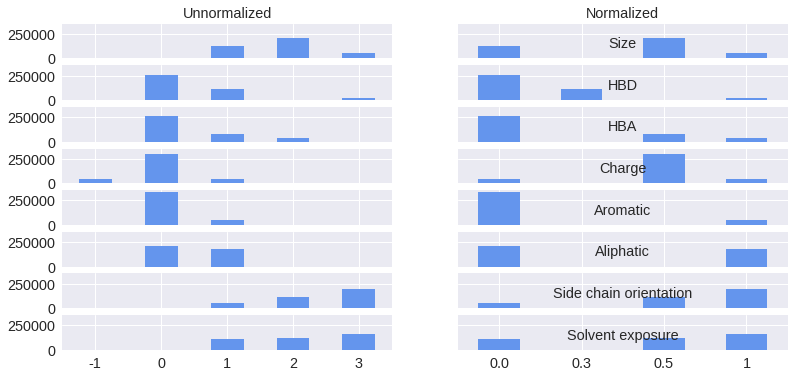

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(13, 6), sharey=True)

counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    ax=[ax[0] for ax in axes],
)
[ax[0].get_legend().remove() for ax in axes]


counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    ax=[ax[1] for ax in axes],
)
[ax[1].set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes]
[
    [
        i.set_visible(False)
        for i in ax[1].legend(loc=9, handlelength=0, handletextpad=0).legendHandles
    ]
    for ax in axes
]

[ax.set_title("") for ax in axes.flatten()]
axes[0][0].set_title("Unnormalized", fontsize="x-large")
axes[0][1].set_title("Normalized", fontsize="x-large")

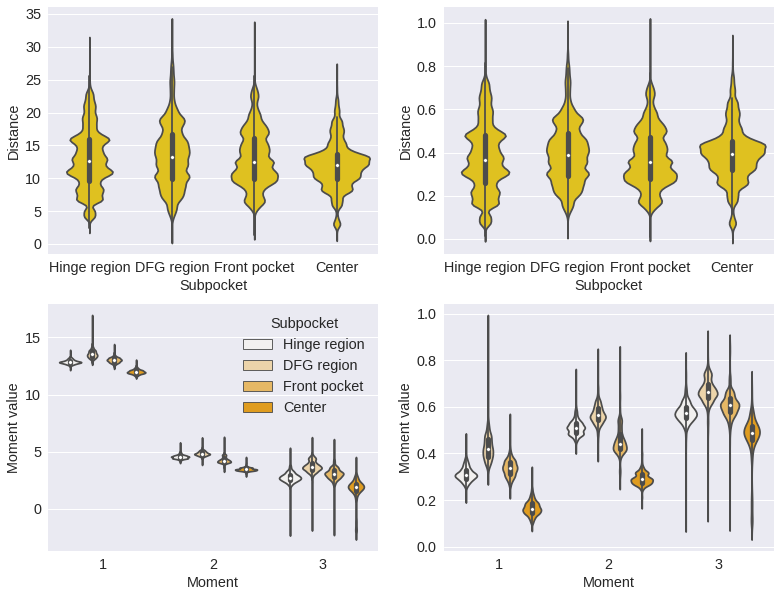

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(13, 10))
for i, f in enumerate([features_d_melted, features_d_normalized_melted]):
    sns.violinplot(
        x=var_name_d,
        y=value_name_d,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["distances"],
        rot=90,
        ax=axes[0][i],
    )
for i, f in enumerate([features_m_melted, features_m_normalized_melted]):
    sns.violinplot(
        x="Moment",
        y=value_name_m,
        hue=var_name_m,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["moments"],
        rot=90,
        ax=axes[1][i],
    )
axes[1][1].get_legend().remove()
# axes[1][0].get_legend().get_title().set_fontsize("x-large")

## Paper plot

In [32]:
df.index = 

SyntaxError: invalid syntax (<ipython-input-32-6c587de6342c>, line 1)

In [ ]:
features_d_melted

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(17, 5))

features_p_count = []
for feature_name, values in features_p.iteritems():
    features_p_count.append(values.value_counts().sort_index())
features_p_count = pd.concat(features_p_count, axis=1)
features_p_count.columns = ["Size", "HBD", "HBA", "Charge", "Aromatic", "Aliphatic", "SCO", "Exposure"]
df = features_p_count[features_p_count.columns[::-1]].transpose()
df.plot(
    kind="barh", 
    stacked=True, 
    color=FEATURE_GROUP_TO_COLOR["physicochemical"], 
    edgecolor="white",
    legend=None, 
    grid=None,
    ax=axes[0]
)
axes[0].set_xticklabels([])

labels = [str(j) for j in df.columns for i in df.index]
patches = axes[0].patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        axes[0].text(x + width/2., y + height/2., label, ha='center', va='center')

sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    ax=axes[1],
)
axes[1].tick_params(axis='x', rotation=20)

sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
    ax=axes[2],
)

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)

In [ ]:
fig.savefig(
    HERE / "feature_distribution.png",
    dpi=300,
    bbox_inches="tight",
)